In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.pyplot as plt
import hvplot.pandas

plt.style.use("seaborn")


In [21]:
#import and read CSV file
complete_data_df = pd.read_csv("Global_Landslide_Catalog_Export.csv")


In [22]:
complete_data_df["month"] = pd.to_datetime(complete_data_df["event_date"]).dt.month

#convert landslide size into numbers

complete_data_df["landslide_size_num"] = np.nan
for index, row in complete_data_df.iterrows():
    if row["landslide_size"] == "small":
        complete_data_df.loc[index,"landslide_size_num"] = 1
    elif row["landslide_size"] == "medium":
        complete_data_df.loc[index,"landslide_size_num"] = 2
    elif row["landslide_size"] == "large":
        complete_data_df.loc[index,"landslide_size_num"] = 3
    elif row["landslide_size"] == "very_large":
        complete_data_df.loc[index,"landslide_size_num"] = 4

In [23]:
selected_data_df = complete_data_df[['longitude','latitude','landslide_size_num','injury_count','fatality_count','event_date',]].dropna()


## Correlation Matrix

In [24]:
# Creating correlation matrix
landslide_corr = selected_data_df.corr()
landslide_corr.unstack().sort_values()

longitude           latitude             -0.536858
latitude            longitude            -0.536858
landslide_size_num  latitude             -0.145200
latitude            landslide_size_num   -0.145200
                    injury_count         -0.059727
injury_count        latitude             -0.059727
fatality_count      latitude             -0.018616
latitude            fatality_count       -0.018616
longitude           injury_count          0.031384
injury_count        longitude             0.031384
fatality_count      longitude             0.042288
longitude           fatality_count        0.042288
fatality_count      landslide_size_num    0.116749
landslide_size_num  fatality_count        0.116749
                    injury_count          0.121300
injury_count        landslide_size_num    0.121300
fatality_count      injury_count          0.141764
injury_count        fatality_count        0.141764
landslide_size_num  longitude             0.234099
longitude           landslide_s

## Linear Regression

In [25]:
# Defining function for linear regression
def regress_plt(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print("The r value is:",rvalue)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values, "green")
    
   
    return line_equation

The r value is: 0.04228756192599263


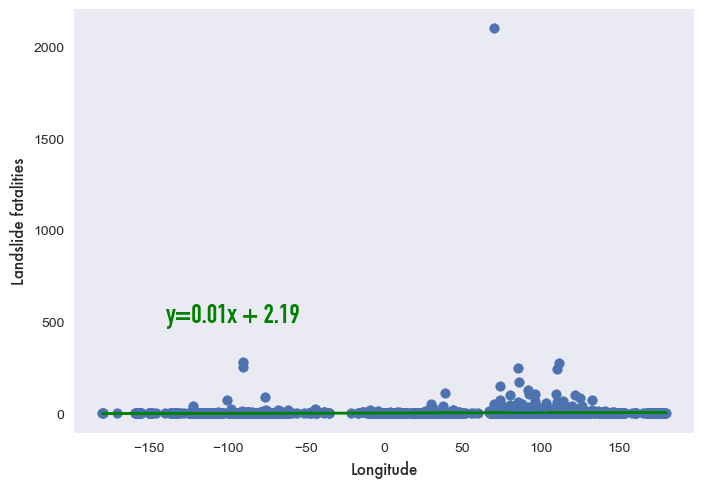

In [26]:
#Longitude and Fatalities
plt.scatter(selected_data_df["longitude"],selected_data_df["fatality_count"])
line_eq = regress_plt(selected_data_df["longitude"],selected_data_df["fatality_count"])
plt.xlabel("Longitude",fontname="futura")
plt.ylabel("Landslide fatalities",fontname="futura")
plt.annotate(line_eq,(-140,500),fontsize="20",color="green",fontname="DIN Condensed")
plt.grid()
plt.savefig("longitude_fatalities.png")
plt.show()


The r value is: 0.1417644076243891


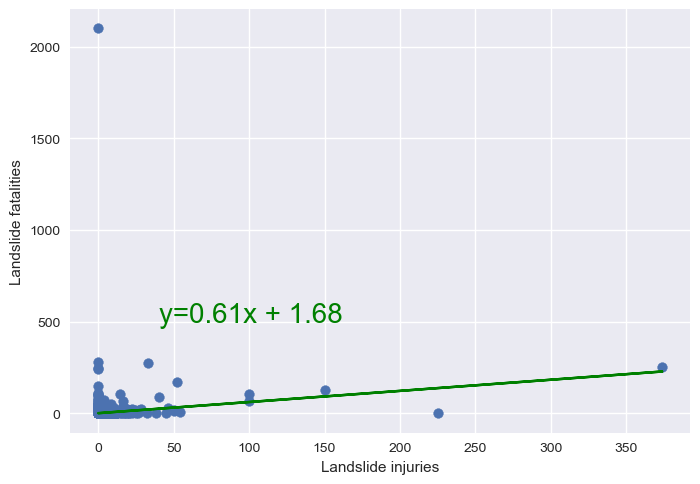

In [27]:
#Comparing injury_count and fatality_count
plt.scatter(selected_data_df["injury_count"],selected_data_df["fatality_count"])
line_eq_two = regress_plt(selected_data_df["injury_count"],selected_data_df["fatality_count"])
plt.annotate(line_eq_two,(40,500),fontsize="20",color="green")
plt.xlabel("Landslide injuries")
plt.ylabel("Landslide fatalities")
plt.savefig("injuries_fatalities.png")
plt.show()


The r value is: 0.11674872630789888


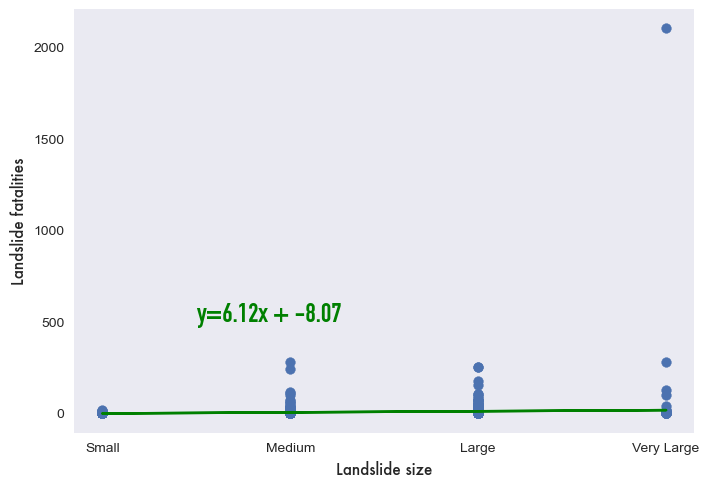

In [28]:
#Comparing landslide size and fatality_count
plt.scatter(selected_data_df["landslide_size_num"],selected_data_df["fatality_count"])
line_eq_three = regress_plt(selected_data_df["landslide_size_num"],selected_data_df["fatality_count"])
tick_locations = (1,2,3,4)
labels = ["Small","Medium","Large","Very Large"]
plt.xlabel("Landslide size",fontname="futura")
plt.ylabel("Landslide fatalities",fontname="futura")
plt.xticks(tick_locations,labels=labels)
plt.grid()
plt.annotate(line_eq_three,(1.5,500),fontsize="20",color="green",fontname="DIN Condensed")

plt.savefig("landslide_size_fatalities.png")
plt.show()


## Maps
### Distrubution of landslides

In [29]:
landslide_map = selected_data_df.hvplot.points("longitude","latitude",geo=True,tiles="EsriNatGeo",color="red",size="landslide_size_num")
landslide_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (landslide_size_num)

###  Distrubution of landslide fatalities

In [30]:

fatality_map = selected_data_df.hvplot.points("longitude","latitude",geo=True,tiles="EsriNatGeo",color="fatality_count",size="fatality_count")
fatality_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (fatality_count)

### Landslides by month

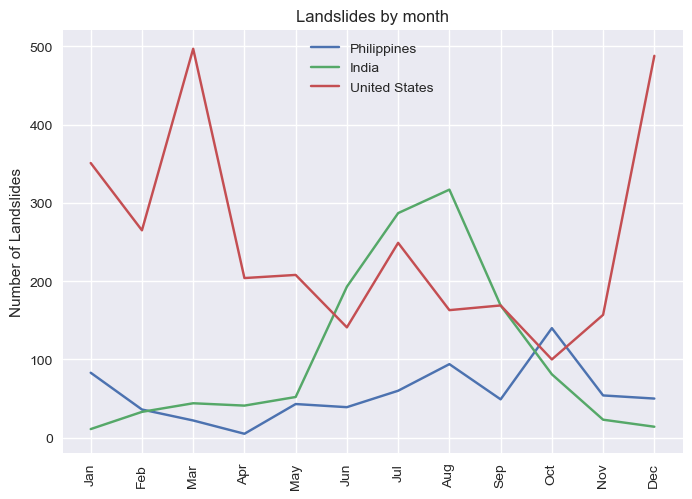

In [38]:
philippines_df = complete_data_df.loc[complete_data_df["country_name"] == "Philippines"]
india_df = complete_data_df.loc[complete_data_df["country_name"] == "India"]
us_df = complete_data_df.loc[complete_data_df["country_code"] == "US"]

philippines_df.groupby("month")["event_id"].count().plot()
india_df.groupby("month")["event_id"].count().plot()
us_df.groupby("month")["event_id"].count().plot()
plt.legend(["Philippines","India","United States"])
tick_locations = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(tick_locations,labels=labels,rotation=90)
plt.title("Landslides by month")
plt.ylabel("Number of Landslides")
plt.xlabel("")
plt.savefig("landslides_month.png")
plt.show()

### Most Common Landslide Triggers

In [32]:
complete_data_df['landslide_trigger'] = complete_data_df['landslide_trigger'].replace({'downpour': 'Heavy rain',
    'rain': 'Heavy rain', 'continuous_rain': 'Heavy rain','flooding': 'Heavy rain',
    'monsoon': 'Monsoon or tropical storm','tropical_cyclone': 'Monsoon or tropical storm', 'unknown': 'Other','no_apparent_trigger':
    'Other', 'other':"Other",'snowfall_snowmelt': 'Snowmelt or Freeze/Thaw','freeze_thaw': 'Snowmelt or Freeze/Thaw', 'mining': 'earth_work',
    'construction': 'earth_work', 'leaking_pipe': 'earth_work','dam_embankment_collapse': 'earth_work',
    'earthquake': 'Natural Disaster','volcano': 'Natural Disaster','vibration': 'Natural Disaster'
})

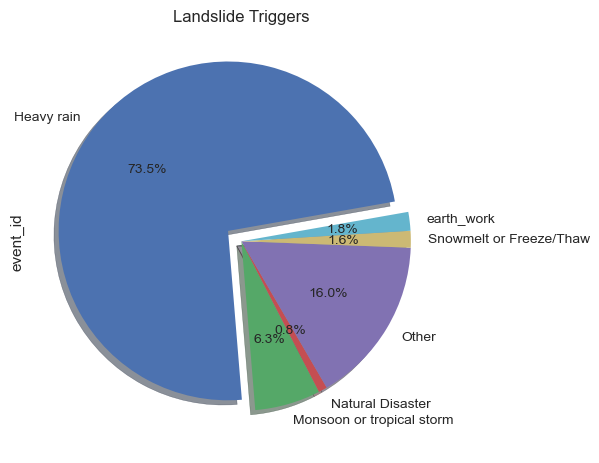

In [35]:
complete_data_df.groupby('landslide_trigger')["event_id"].count().plot(kind="pie",explode=[0.1,0,0,0,0,0],startangle=10,shadow=True,autopct="%1.1f%%")
plt.title("Landslide Triggers")
plt.savefig("landslide_triggers.png")

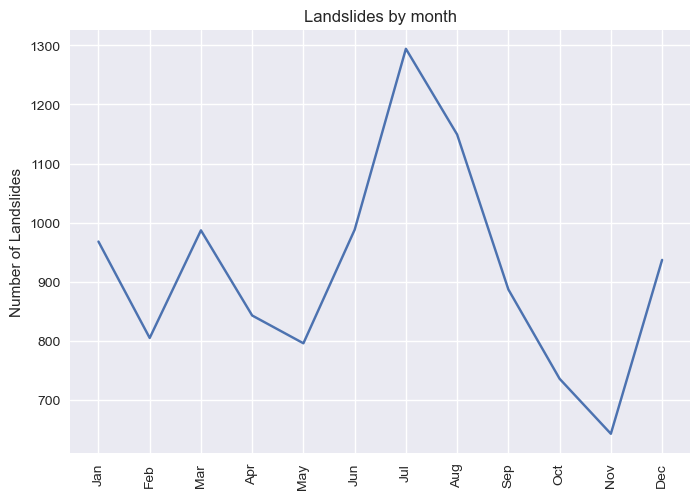

In [37]:
complete_data_df.groupby("month")["event_id"].count().plot()

tick_locations = [1,2,3,4,5,6,7,8,9,10,11,12]
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xticks(tick_locations,labels=labels,rotation=90)
plt.title("Landslides by month")
plt.ylabel("Number of Landslides")
plt.xlabel("")
plt.savefig("landslides_month_global.png")
plt.show()